In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
df = pd.read_csv("titanic.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df["Cabin"].fillna("UNKNOWN",inplace = True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64


In [ ]:
df["Age"].fillna(29,inplace = True)

In [ ]:
df["Embarked"].fillna("U",inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
print(df.head())
df



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#For Cluster 1 Age VS Fare

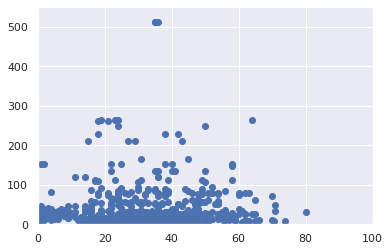

In [ ]:
plt.scatter(df['Age'],df['Fare'])
plt.xlim(0,100)
plt.ylim(0,550)
plt.show()

In [ ]:
x = df.iloc[:,5:10]
x.drop("Parch", inplace = True, axis =1)
x.drop("SibSp", inplace = True, axis =1)
x.drop("Ticket", inplace = True, axis =1)
x.dropna()
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,29.0,23.4500
889,26.0,30.0000


In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0,

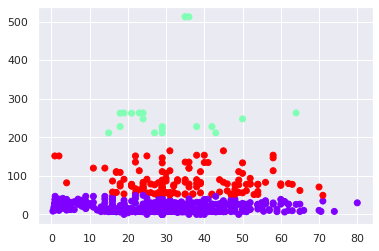

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Age'],data_with_clusters['Fare'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

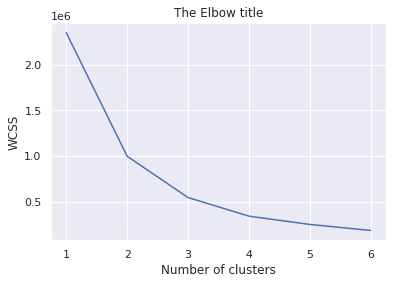

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#For Cluser 2 Sex VS Age

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Sex'].replace(['female', 'male'],[1, 0], inplace=True)

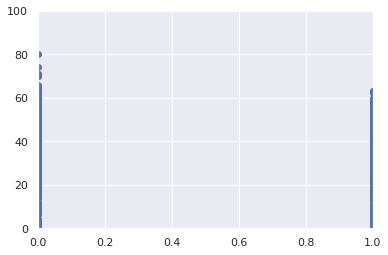

In [ ]:
plt.scatter(df['Sex'],df['Age'])
plt.xlim(0,1)
plt.ylim(0,100)
plt.show()

In [ ]:
x1 = df.iloc[:,4:6]

x1.dropna()
x1

,Sex,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,1,29.0
889,0,26.0


In [ ]:
kmeans = KMeans(3)
kmeans.fit(x1)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x1)
identified_clusters

array([1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1,

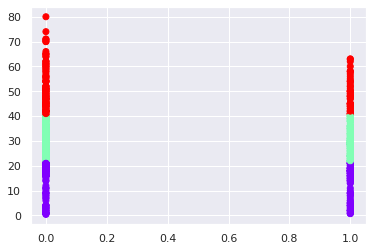

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Sex'],data_with_clusters['Age'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

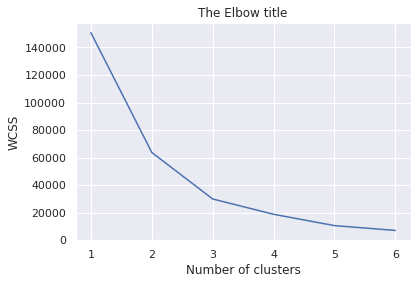

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# For Cluster 3 Passenger Class vs Survived

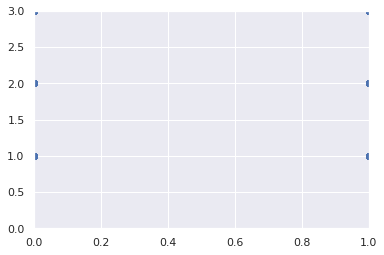

In [ ]:
plt.scatter(df['Survived'],df['Pclass'])
plt.xlim(0,1)
plt.ylim(0,3)
plt.show()

In [ ]:
x2 = df.iloc[:,1:3]

x2.dropna()
x2

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [ ]:
kmeans = KMeans(3)
kmeans.fit(x2)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x2)
identified_clusters

array([1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2,
       1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0,

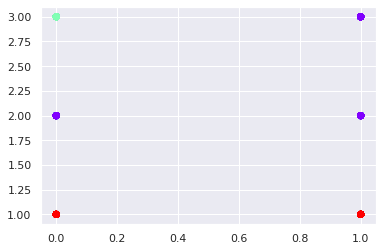

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Survived'],data_with_clusters['Pclass'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

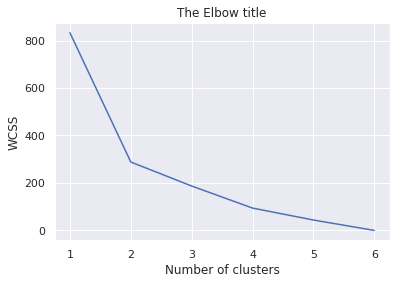

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x2)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# For 4th Cluster Combination Sibling/Spouse Vs Parent/Child

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

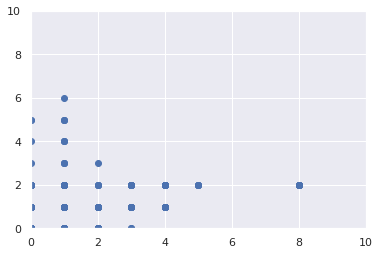

In [ ]:
plt.scatter(df['SibSp'],df['Parch'])
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [ ]:
x3 = df.iloc[:,6:8]

x3.dropna()
x3

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [ ]:
kmeans = KMeans(5)
kmeans.fit(x3)
identified_clusters = kmeans.fit_predict(x3)
identified_clusters

array([3, 3, 0, 3, 0, 0, 0, 2, 1, 3, 3, 0, 0, 1, 0, 0, 2, 0, 3, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 1,
       0, 0, 3, 0, 3, 3, 2, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 0, 3, 2, 0, 3,
       0, 0, 2, 3, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 0, 1, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0, 1, 1, 0, 0, 3, 0, 1,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 3, 0, 0, 3,
       2, 0, 0, 0, 4, 0, 2, 3, 1, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 3, 1, 0, 0, 3, 3,
       0, 0, 0, 3, 0, 1, 3, 3, 0, 3, 0, 3, 1, 1, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0,

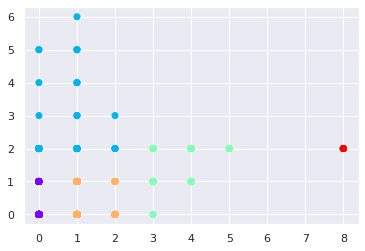

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['SibSp'],data_with_clusters['Parch'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

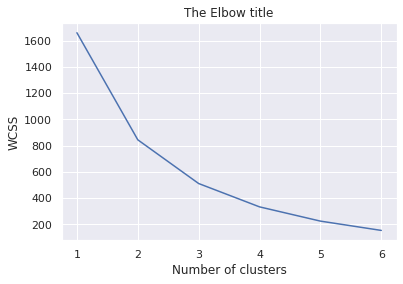

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x3)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#For 5 th Cluster Combination Parent/child Vs Fare

In [ ]:
x4 = df.iloc[:,6:10]
x4.drop("SibSp", inplace = True, axis =1)
x4.drop("Ticket", inplace = True, axis =1)
x4.dropna()
x4

,Parch,Fare
0,0,7.2500
1,0,71.2833
2,0,7.9250
3,0,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,0,30.0000
888,2,23.4500
889,0,30.0000


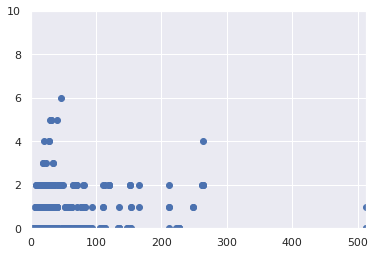

In [ ]:
plt.scatter(df['Fare'],df['Parch'])
plt.xlim(0,512)
plt.ylim(0,10)
plt.show()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(x4)
identified_clusters = kmeans.fit_predict(x4)
identified_clusters

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,

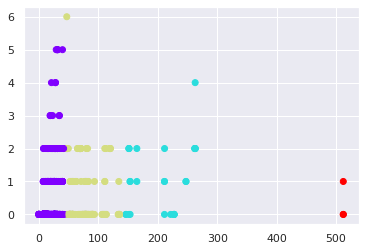

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Fare'],data_with_clusters['Parch'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

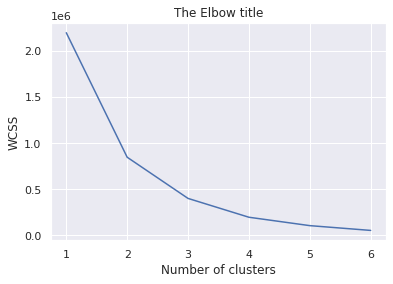

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x4)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#For 6 th Cluster Combination  Passenger Age VS SibSp

In [ ]:
x5 = df.iloc[:,5:8]
x5.drop("Parch", inplace = True, axis =1)
x5.dropna()
x5

,Age,SibSp
0,22.0,1
1,38.0,1
2,26.0,0
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,29.0,1
889,26.0,0


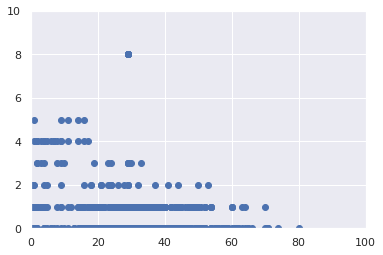

In [ ]:
plt.scatter(df['Age'],df['SibSp'])
plt.xlim(0,100)
plt.ylim(0,10)
plt.show()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(x5)
identified_clusters = kmeans.fit_predict(x5)
identified_clusters

array([2, 0, 0, 0, 0, 0, 1, 3, 0, 2, 3, 1, 2, 0, 2, 1, 3, 0, 0, 0, 0, 0,
       2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 3,
       2, 0, 0, 0, 0, 2, 3, 2, 1, 0, 1, 0, 2, 0, 3, 3, 2, 0, 1, 3, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 3, 2, 0, 0, 0, 1, 3, 0, 2, 0, 1, 0, 2,
       1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 3, 0, 1, 1, 2, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 3, 3, 0, 1, 0, 0, 1, 3, 3, 2, 1, 2,
       0, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 1, 0, 0, 0, 2, 2, 3, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 3, 2, 0, 1, 3, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 3, 0, 1, 0,

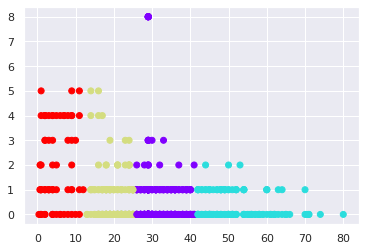

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Age'],data_with_clusters['SibSp'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

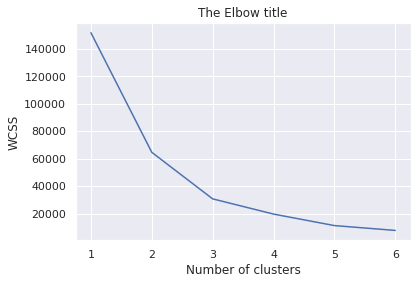

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x5)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')